<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [12]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
# type your code here
df = pd.read_csv('malaria.csv')
df.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
for col in df.columns:
    if((df[col].isnull().sum()) == len(df)):
        print(col)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
for col in df.columns:
    if((((df[col].isnull().sum())/len(df))*100) > 60):
        print(col)

Cases_Nigeria
Cases_Senegal
Cases_Spain
Cases_Mali
Deaths_Nigeria
Deaths_Senegal
Deaths_Spain
Deaths_Mali


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
for col in df.columns:
    print(col,':',df[col].isnull().sum())
    


Cases_Guinea : 34
Cases_Liberia : 44
Cases_SierraLeone : 40
Cases_Nigeria : 89
Cases_Senegal : 102
Cases_UnitedStates : 54
Cases_Spain : 111
Cases_Mali : 115
Deaths_Guinea : 35
Deaths_Liberia : 46
Deaths_SierraLeone : 40
Deaths_Nigeria : 89
Deaths_Senegal : 105
Deaths_UnitedStates : 70
Deaths_Spain : 111
Deaths_Mali : 115


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

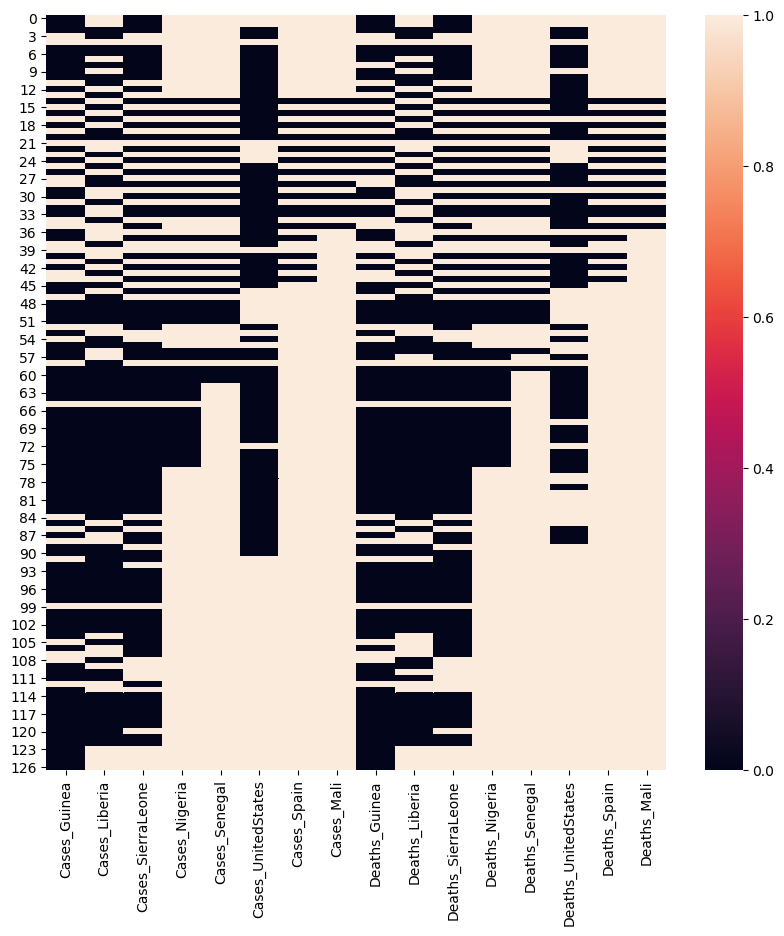

In [37]:
# type your code here
x = df.isnull()
plt.figure(figsize = (10,10),dpi = 100)
sns.heatmap(x)
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
df.dropna(thresh = 2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
# type your code here
c = []
for col in df.columns:
    if((df[col].isnull().sum()/len(df))>0.60):
        c.append(col)

df.drop(columns = c,axis = 1).head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# type your code here
print('percentage of missing values in Cases_Liberia: ',(df['Cases_Liberia'].isnull().sum()/len(df))*100)
print(df['Cases_Liberia'].skew())
print('since the column is skewed towards the right, dropping the column is not advisable we would replace the NaN values with the median')
df['Cases_Liberia'] = df['Cases_Liberia'].fillna(df['Cases_Liberia'].median())

percentage of missing values in Cases_Liberia:  34.645669291338585
0.9491336030709361
since the column is skewed towards the right, dropping the column is not advisable we would replace the NaN values with the median


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

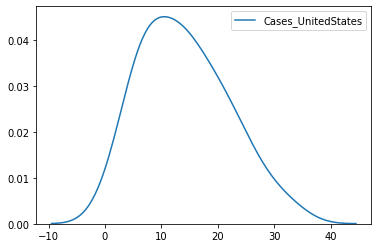

In [80]:
sns.kdeplot(df['Cases_UnitedStates'])

In [89]:
# type your code here
print('percentage of missing values in Cases_UnitedStates: ',(df['Cases_UnitedStates'].isnull().sum()/len(df))*100)
print('skew of Cases_UnitedStates:',df['Cases_UnitedStates'].skew())
print('since it is positively skewed would replace all the NaN values with the mean of the column')
df['Cases_UnitedStates'] = df['Cases_UnitedStates'].fillna(df['Cases_UnitedStates'].mean())

percentage of missing values in Cases_UnitedStates:  0.0
skew of Cases_UnitedStates: 0.6124626410712122
since it is positively skewed would replace all the NaN values with the mean of the column


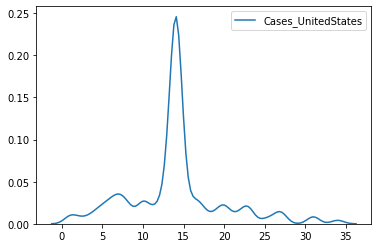

In [82]:
sns.kdeplot(df['Cases_UnitedStates'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# type your code here
print('percentage of missing values in Cases_Guinea: ',(df['Cases_Guinea'].isnull().sum()/len(df))*100)
print('skew of Cases_UnitedStates:',df['Cases_Guinea'].skew())
print('since the column is skewed towards the right, dropping the column is not advisable we would replace the NaN values with the median')
df['Cases_Guinea'] = df['Cases_Guinea'].fillna(df['Cases_Guinea'].median())

percentage of missing values in Cases_Guinea:  26.77165354330709
skew of Cases_UnitedStates: 1.0023009483886705
since the column is skewed towards the right, dropping the column is not advisable we would replace the NaN values with the median


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [3]:
df1 = pd.read_csv('house.csv')
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
print('Below are the features that can be exempted from the dataset')
u = df1.select_dtypes(np.number)
r = []
for col in u.columns:
    if(u[col].skew() > 0.85):
        r.append(u[col])
        
print(r)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
# type your code here
df1['zcar'] = zscore(df1['Car'])
df1[(df1['zcar'] < -3) | (df1['zcar'] > 3)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,zcar
56,3,h,1470000,S,Northern Metropolitan,2,5,612,17.0,2,3.511417
144,2,u,860000,S,Western Metropolitan,3,6,1057,13.5,3,4.540782
180,3,h,536000,S,Western Metropolitan,3,6,592,16.9,2,4.540782
189,2,u,620000,PI,Southern Metropolitan,2,5,537,21.2,2,3.511417
322,3,h,700000,S,Eastern Metropolitan,2,5,559,20.4,2,3.511417
511,3,h,630000,SP,Northern Metropolitan,4,7,2051,23.2,3,5.570147
569,3,h,650000,SP,South-Eastern Metropolitan,3,5,655,18.9,4,3.511417
589,3,h,800000,SP,Northern Metropolitan,7,6,0,16.4,3,4.540782
679,2,h,355000,S,Western Metropolitan,1,6,691,13.4,2,4.540782
702,3,h,770000,S,South-Eastern Metropolitan,2,5,754,11.8,5,3.511417


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

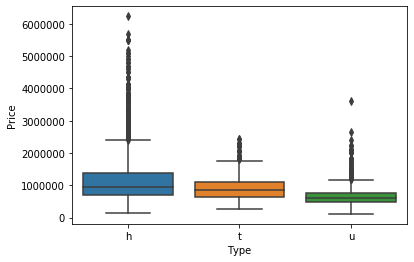

In [116]:
# type your code here
#df1.groupby('Type')['Price'].plot(kind = 'box')
sns.boxplot(data = df1, x = 'Type', y = 'Price')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# type your code here
df1['zrooms'] = zscore(df1['Rooms'])
df1[(df1['zrooms'] < -3) | (df1['zrooms'] > 3)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,zcar,zrooms
82,7,h,4000000,S,South-Eastern Metropolitan,1,0,126,16.7,2,-1.635407,4.178001
174,7,h,1716000,S,Eastern Metropolitan,1,1,929,23.1,3,-0.606042,4.178001
266,6,h,1815000,S,Northern Metropolitan,1,1,1194,17.7,1,-0.606042,3.111173
394,6,h,1550000,S,Western Metropolitan,3,4,700,21.5,4,2.482052,3.111173
469,6,h,1856000,SP,Eastern Metropolitan,1,1,581,31.0,3,-0.606042,3.111173
470,7,h,2705000,S,Eastern Metropolitan,3,2,873,26.2,3,0.423323,4.178001
507,6,h,990000,S,Northern Metropolitan,2,2,744,13.2,3,0.423323,3.111173
563,6,h,1200000,PI,Eastern Metropolitan,3,2,674,18.0,3,0.423323,3.111173
584,6,h,1900000,PI,Southern Metropolitan,2,1,259,23.1,3,-0.606042,3.111173
667,6,h,2800000,S,Southern Metropolitan,3,1,362,17.8,1,-0.606042,3.111173


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
# type your code here
df1['zbathroom'] = zscore(df1['Bathroom'])
df1[(df1['zbathroom'] < -3) | (df1['zbathroom'] > 3)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,zcar,zrooms,zbathroom
103,3,t,385000,S,Northern Metropolitan,7,0,435,18.0,3,-1.635407,-0.089313,7.203065
122,3,t,950000,S,Eastern Metropolitan,4,4,809,19.3,3,2.482052,-0.089313,3.210608
229,1,u,337000,S,South-Eastern Metropolitan,4,2,662,12.7,3,0.423323,-2.222970,3.210608
382,3,h,720000,S,Western Metropolitan,5,2,755,14.0,4,0.423323,-0.089313,4.541427
448,3,h,1116000,S,Southern Metropolitan,5,4,673,19.0,3,2.482052,-0.089313,4.541427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,2,u,560000,PI,Southern Metropolitan,4,2,355,11.6,3,0.423323,-1.156141,3.210608
4132,2,u,600000,S,Southern Metropolitan,4,2,636,27.2,2,0.423323,-1.156141,3.210608
4497,4,h,1730000,S,Southern Metropolitan,4,3,569,23.8,3,1.452687,0.977516,3.210608
4681,3,h,870000,VB,Western Metropolitan,4,3,188,20.4,2,1.452687,-0.089313,3.210608


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
# type your code here
df1['zbedroom'] = zscore(df1['Bedroom'])
df1[(df1['zbedroom'] < -3) | (df1['zbedroom'] > 3)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,zcar,zrooms,zbathroom,zbedroom
130,3,h,900000,S,Eastern Metropolitan,1,1,180,21.3,7,-0.606042,-0.089313,-0.781849,3.833854
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8,-0.606042,-0.089313,-0.781849,4.778444
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9,0.423323,-1.156141,-0.781849,5.723034
752,3,t,891000,S,Western Metropolitan,1,1,632,18.2,7,-0.606042,-0.089313,-0.781849,3.833854
761,1,u,401000,S,Southern Metropolitan,1,2,624,20.6,7,0.423323,-2.222970,-0.781849,3.833854
891,4,h,1200000,S,Eastern Metropolitan,2,1,316,28.4,7,-0.606042,0.977516,0.548970,3.833854
920,3,h,600000,S,Northern Metropolitan,2,1,281,23.2,7,-0.606042,-0.089313,0.548970,3.833854
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9,0.423323,-0.089313,0.548970,5.723034
1816,3,h,1037000,S,Northern Metropolitan,1,1,820,18.7,7,-0.606042,-0.089313,-0.781849,3.833854
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30,-0.606042,-0.089313,-0.781849,25.559425


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
# type your code here
x = df1['Distance'].mean()
q1 = df1['Distance'].quantile(0.25)
q3 = df1['Distance'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
z = df1[(df1['Distance'] > ll) | (df1['Distance']) < ul]
y = z['Distance'].mean()
print((y/x)*100)

100.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
q1 = df1['Price'].quantile(0.25)
q3 = df1['Price'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)

620000.0
1244250.0


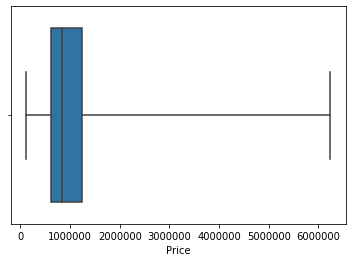

In [6]:
sns.boxplot(df1['Price'],whis = 3000000)

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
nbins = 3
z = le.fit_transform(pd.cut(df1['Distance'], nbins, retbins=True)[0])
df1['GroupDistance'] = z
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,GroupDistance
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,1
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,1
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,1
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

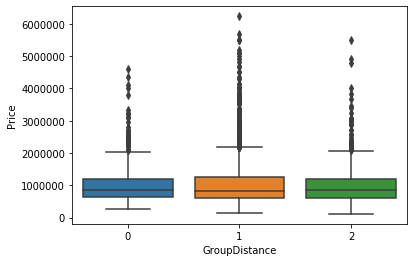

In [17]:
# type your code here
sns.boxplot(df1['GroupDistance'],df1['Price'])

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
df4 = pd.read_csv('house.csv')

In [123]:
# type your code here
from sklearn.model_selection import train_test_split
tts = train_test_split
y = df4['Price']
x = df4.drop(columns = 'Price')

In [126]:
xTrain, XTest, yTrain, YTest = tts(x,y,test_size = 0.2, random_state = 0)

In [127]:
print('xTrain:',xTrain.shape)
print('XTest:',XTest.shape)
print('yTrain',yTrain.shape)
print('YTest',YTest.shape)

xTrain: (3812, 9)
XTest: (954, 9)
yTrain (3812,)
YTest (954,)
